In [47]:
import numpy as np
import matplotlib.pyplot as plt

In [48]:
def psd2th_sine(freq,psd,dur):
    fmax=max(freq); fmin=min(freq);
    dt=1/(fmax*2);
    N=int(dur/dt)+1; Nf=int(N/2)+1;
    tmax=(N-1)*dt;
    df=1/(N*dt);
    fi=np.linspace(fmin,fmax,Nf);
    pi=10**np.interp(np.log10(fi),np.log10(freq),np.log10(psd));
    ti=np.linspace(0,tmax,N);
    A=np.sqrt(2*df*pi);
    p=np.random.uniform(0,2*np.pi,Nf);
    th=np.zeros(N);
    for i in range(Nf):
        th+=A[i]*np.cos(2*np.pi*fi[i]*ti+p[i]);
    return ti,th;  
    

In [49]:
freq=np.array([1,10,500,1000]);
psd =np.array ([0.01,0.04,0.04,0.01]);

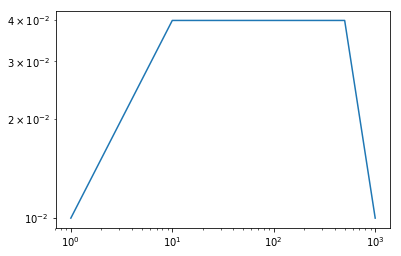

In [50]:
plt.loglog(freq,psd);

In [105]:
ti,th=psd2th_sine(freq,psd,10);

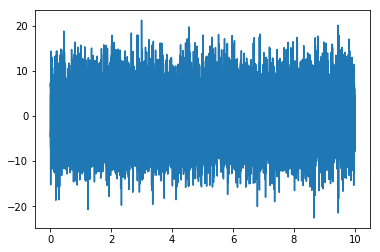

In [106]:
plt.plot(ti,th);

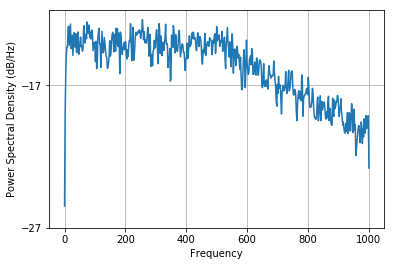

In [107]:
dt=ti[1]-ti[0];
Pxx,freq1=plt.psd(th,Fs=1/dt,NFFT=2**10);
#plt.xscale('log');
#plt.yscale('log');

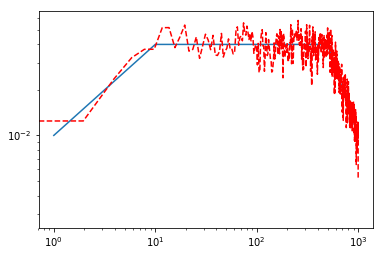

In [108]:
plt.loglog(freq,psd);
plt.loglog(freq1,Pxx,'r--');

In [96]:
len (freq1)

2

In [97]:
1/dt

2000.0

In [90]:
len (th)

2001

In [91]:
1/(dt*len (th))

0.9995002498750625